# My Facebook Wordcloud

This notebook shows the most frequently used words in my Facebook posts until July 2016. I had previously retrieved my data using the [Facebook Graph API](https://developers.facebook.com/tools/explorer/).

In [1]:
%config InlineBackend.figure_format = 'retina'

In [2]:
import pandas as pd
from nltk.corpus import stopwords
from wordcloud import WordCloud
from string import punctuation
import matplotlib.pyplot as plt

In [3]:
df = pd.read_json("dani.json")["feed"]["data"]

I needed to remove some stopwords, so I used these great resources:
* [Resource 1](http://stackoverflow.com/questions/5541745/get-rid-of-stopwords-and-punctuation).
* [Resource 2](http://blog.manugarri.com/sentiment-analysis-in-spanish/).

In [4]:
my_list = []
non_words = list(punctuation)
non_words.extend(['¿', '¡', '\n'])  
for status in df:
    if "message" in status.keys():
        lowercase_status = status["message"].lower()
        words = ''.join([c for c in lowercase_status if c not in non_words])
        words = words.split(" ")
        important_words_es = filter(lambda x: x not in stopwords.words('spanish'), words)
    for word in important_words_es:
        if len(word)>2 and not word.isdigit():
            my_list.append(word)


In [5]:
with open("dani.txt", "w") as file:
    for word in my_list:
        file.write("{0}\n".format(word))


In [8]:
text = open("dani.txt").read()

The following plot shows my most frequently used words on Facebook.

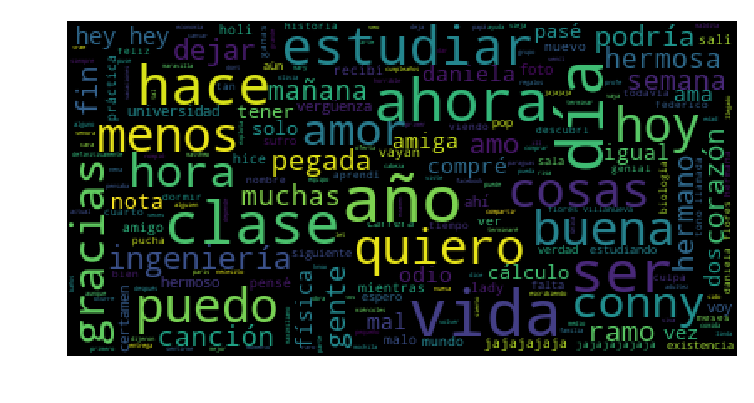

In [7]:
wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()